In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

import scipy.stats as st
import statsmodels.api as sm
import pylab as py

# here are some of the tools we will use for our analyses
from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay

from sklearn.metrics import r2_score

In [45]:
import random

In [46]:
random.seed(100)

In [47]:
import shap

In [48]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [49]:
dataset = pd.read_excel(r"Final Project 2302 Data - group 13.xlsx",na_values=['--'])
dataset.dropna(inplace=True)

In [50]:
#from google.colab import drive
#drive.mount('/content/drive')

In [51]:
dataset.head()

,NPA,median_age_of_residents_2022,high_speed_internet_access_2022,employment_2022,single_family_housing_2022_Raw,residential_occupancy_2022,home_ownership_2022,vacant_land_in_acres_2022,proximity_to_public_transportation_2022,street_connectivity_index_2022,proximity_to_school_age_care_2022,proximity_to_early_care_and_education_2022
0,2,33.0,0.766,0.955,504,0.940,0.387,21,1129,1.0,1121,651
1,3,31.0,0.916,0.976,1613,0.864,0.389,25,8510,2.0,6605,7502
2,4,44.0,0.919,0.980,364,0.897,1.000,13,353,1.0,162,172
3,5,31.0,0.639,0.847,189,0.940,0.232,36,336,1.0,346,346
4,6,36.0,0.598,1.000,675,0.880,0.315,37,811,1.0,789,811


In [52]:
dtree_9 = DecisionTreeClassifier(max_depth=9, random_state=100)
log_reg = LogisticRegression()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
svm_lin = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

In [53]:
scaler = StandardScaler()

In [54]:
x = dataset[['high_speed_internet_access_2022','employment_2022','single_family_housing_2022_Raw','residential_occupancy_2022','home_ownership_2022','vacant_land_in_acres_2022','proximity_to_public_transportation_2022','street_connectivity_index_2022','proximity_to_school_age_care_2022','proximity_to_early_care_and_education_2022']]
#y = dataset['median_age_of_residents_2022']


In [55]:
dataset['median_age_of_residents_2022_binary'] = (dataset['median_age_of_residents_2022'] > 35).astype(int)
y = dataset['median_age_of_residents_2022_binary']

dataset.head()

,NPA,median_age_of_residents_2022,high_speed_internet_access_2022,employment_2022,single_family_housing_2022_Raw,residential_occupancy_2022,home_ownership_2022,vacant_land_in_acres_2022,proximity_to_public_transportation_2022,street_connectivity_index_2022,proximity_to_school_age_care_2022,proximity_to_early_care_and_education_2022,median_age_of_residents_2022_binary
0,2,33.0,0.766,0.955,504,0.940,0.387,21,1129,1.0,1121,651,0
1,3,31.0,0.916,0.976,1613,0.864,0.389,25,8510,2.0,6605,7502,0
2,4,44.0,0.919,0.980,364,0.897,1.000,13,353,1.0,162,172,1
3,5,31.0,0.639,0.847,189,0.940,0.232,36,336,1.0,346,346,0
4,6,36.0,0.598,1.000,675,0.880,0.315,37,811,1.0,789,811,1


In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**logisitic**

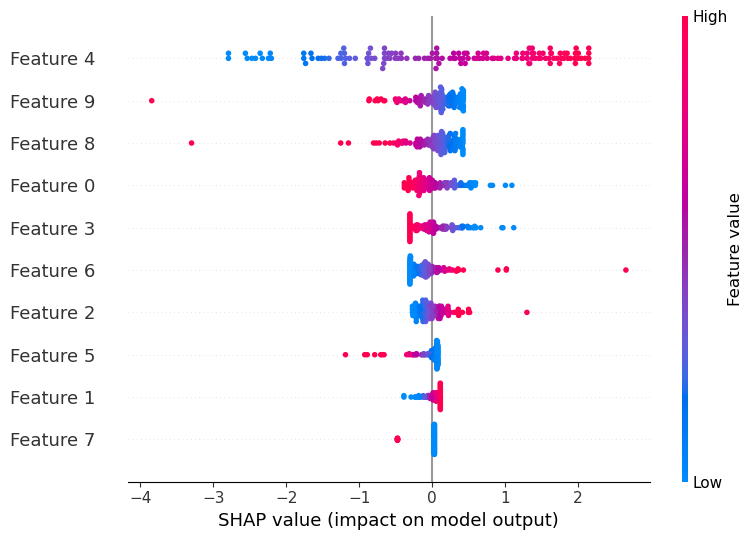

In [57]:
# shap for logistic

log_reg.fit(X_train_scaled, y_train)

# Create a SHAP explainer object
explainer = shap.Explainer(log_reg, X_train_scaled)

# Get SHAP values for the test set
shap_values = explainer(X_test_scaled)

# Plot the SHAP summary plot (global explanation of the model)
shap.summary_plot(shap_values, X_test_scaled)

**Svm lin**

.values =
array([[-1.81624000e-01,  5.98223093e-02, -8.58012989e-02, ...,
        -2.04279586e-01, -4.20371001e-02, -1.14576493e+00],
       [-1.12780091e-01,  3.84741418e-02,  1.13811955e-01, ...,
         1.30391225e-02,  2.94473387e-02,  4.34069152e-01],
       [ 9.76206626e-03,  5.98223093e-02, -2.68780584e-03, ...,
         1.30391225e-02,  1.03218571e-02,  8.34758358e-02],
       ...,
       [ 3.27820925e-01,  2.78000581e-02, -4.35402007e-02, ...,
         1.30391225e-02, -2.15539455e-02, -3.13863256e-01],
       [-8.93731623e-02,  3.72881325e-02,  3.73193671e-02, ...,
         1.30391225e-02,  5.82028544e-04,  1.07601850e-02],
       [-2.00900294e-01,  4.67762070e-02,  5.81681755e-02, ...,
         1.30391225e-02,  3.31661823e-02,  4.37531802e-01]])

.base_values =
array([0.13729307, 0.13729307, 0.13729307, 0.13729307, 0.13729307,
       0.13729307, 0.13729307, 0.13729307, 0.13729307, 0.13729307,
       0.13729307, 0.13729307, 0.13729307, 0.13729307, 0.13729307,
       0.1372930

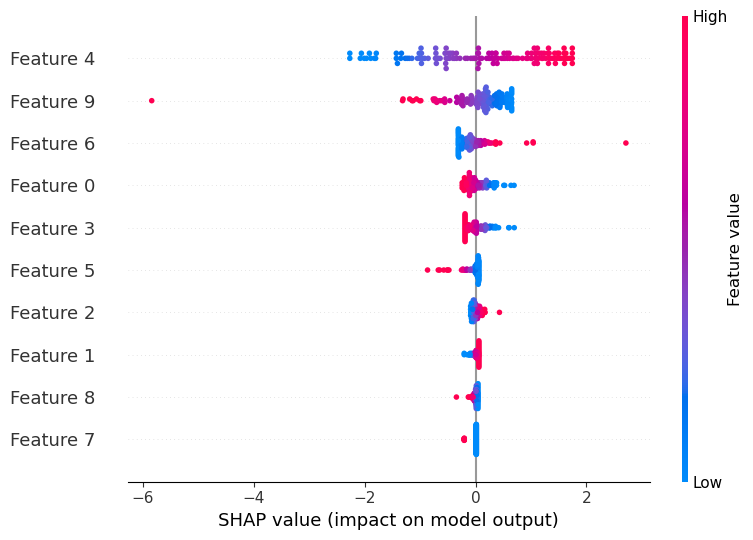

In [58]:
svm_lin.fit(X_train_scaled, y_train)

# Create a SHAP explainer object
explainer = shap.Explainer(svm_lin, X_train_scaled)

# Get SHAP values for the test set
shap_values = explainer(X_test_scaled)
print(shap_values)
# Plot the SHAP summary plot (global explanation of the model)
shap.summary_plot(shap_values, X_test_scaled)

**lda**

.values =
array([[-2.80876526e-01,  1.22181533e-01, -1.13866772e-02, ...,
        -1.77906667e-01, -3.73802621e-01, -5.05872092e-01],
       [-1.74411312e-01,  7.85798759e-02,  1.51039671e-02, ...,
         1.13557447e-02,  2.61851849e-01,  1.91647924e-01],
       [ 1.50967672e-02,  1.22181533e-01, -3.56698301e-04, ...,
         1.13557447e-02,  9.17840963e-02,  3.68558110e-02],
       ...,
       [ 5.06966053e-01,  5.67790472e-02, -5.77821336e-03, ...,
         1.13557447e-02, -1.91662158e-01, -1.38575251e-01],
       [-1.38213140e-01,  7.61575616e-02,  4.95264748e-03, ...,
         1.13557447e-02,  5.17551864e-03,  4.75078016e-03],
       [-3.10686786e-01,  9.55360760e-02,  7.71948965e-03, ...,
         1.13557447e-02,  2.94920578e-01,  1.93176735e-01]])

.base_values =
array([0.12324044, 0.12324044, 0.12324044, 0.12324044, 0.12324044,
       0.12324044, 0.12324044, 0.12324044, 0.12324044, 0.12324044,
       0.12324044, 0.12324044, 0.12324044, 0.12324044, 0.12324044,
       0.1232404

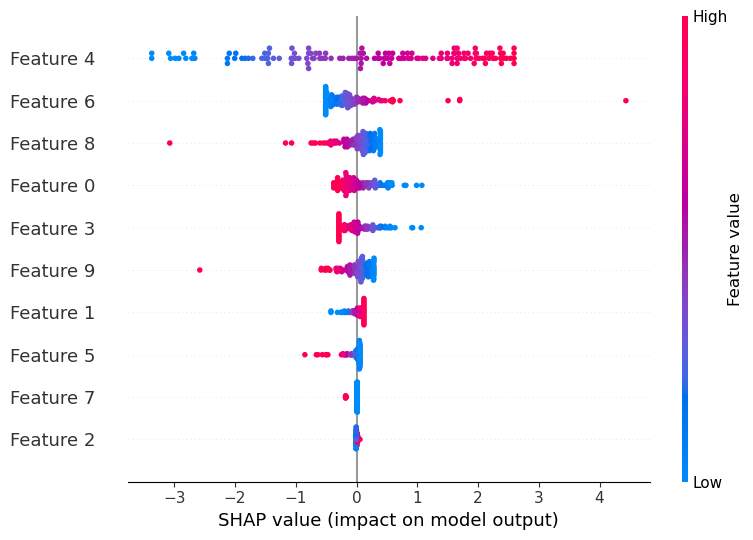

In [59]:
lda.fit(X_train_scaled, y_train)

# Create a SHAP explainer object
explainer = shap.Explainer(lda, X_train_scaled)

# Get SHAP values for the test set
shap_values = explainer(X_test_scaled)
print(shap_values)
# Plot the SHAP summary plot (global explanation of the model)
shap.summary_plot(shap_values, X_test_scaled)

## Accuracy

features from 0 - 9

0 = high spped internet

1 = employment

2 = single family housing

3 = residential occupancy

4 = home ownership 

5 = vacant land in acres

6 = proximity to public transportation

7 = street connectivity index

8 = proximity to school age care

9 = proximity to early care and education

In [60]:
dtree_9 = DecisionTreeClassifier(max_depth=9, random_state=100)
log_reg = LogisticRegression()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
svm_lin = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

In [61]:
'high_speed_internet_access_2022','employment_2022','single_family_housing_2022_Raw','residential_occupancy_2022','home_ownership_2022','vacant_land_in_acres_2022','proximity_to_public_transportation_2022','street_connectivity_index_2022','proximity_to_school_age_care_2022','proximity_to_early_care_and_education_2022'

('high_speed_internet_access_2022',
 'employment_2022',
 'single_family_housing_2022_Raw',
 'residential_occupancy_2022',
 'home_ownership_2022',
 'vacant_land_in_acres_2022',
 'proximity_to_public_transportation_2022',
 'street_connectivity_index_2022',
 'proximity_to_school_age_care_2022',
 'proximity_to_early_care_and_education_2022')

logisitic

In [62]:
log_x = dataset[['home_ownership_2022','high_speed_internet_access_2022']]

In [63]:
log_reg.fit(X_train_scaled, y_train)


accuracy = cross_val_score(log_reg, X_test_scaled, y_test, cv = 8)
print(f"logisitic cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

logisitic cross-validation accuracy: 72.26%


In [64]:
log_reg = LogisticRegression()


X_train, X_test, y_train, y_test = train_test_split(log_x, y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg.fit(X_train_scaled, y_train)


accuracy = cross_val_score(log_reg, X_test_scaled, y_test, cv = 8)
print(f"logisitic cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

logisitic cross-validation accuracy: 76.72%


In [65]:
log_x = dataset[['home_ownership_2022','high_speed_internet_access_2022']]
y = dataset['median_age_of_residents_2022_binary']

In [66]:
log_reg = LogisticRegression()


X_train, X_test, y_train, y_test = train_test_split(log_x, y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg.fit(X_train_scaled, y_train)


accuracy = cross_val_score(log_reg, X_test_scaled, y_test, cv = 8)
print(f"logisitic cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

logisitic cross-validation accuracy: 76.72%


lda

In [67]:
x = dataset[['high_speed_internet_access_2022','employment_2022','single_family_housing_2022_Raw','residential_occupancy_2022','home_ownership_2022','vacant_land_in_acres_2022','proximity_to_public_transportation_2022','street_connectivity_index_2022','proximity_to_school_age_care_2022','proximity_to_early_care_and_education_2022']]
#y = dataset['median_age_of_residents_2022']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lda.fit(X_train_scaled, y_train)


accuracy = cross_val_score(lda, X_test_scaled, y_test, cv = 8)
print(f"logisitic cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

logisitic cross-validation accuracy: 72.30%


In [69]:
#lda.fit(X_train_scaled, y_train)


#accuracy = cross_val_score(lda, X_test_scaled, y_test, cv = 8)
#print(f"lda cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

In [70]:
lda_x = dataset[['home_ownership_2022','high_speed_internet_access_2022']]

In [71]:
lda = LinearDiscriminantAnalysis()


X_train, X_test, y_train, y_test = train_test_split(lda_x, y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lda.fit(X_train_scaled, y_train)


accuracy = cross_val_score(lda, X_test_scaled, y_test, cv = 8)
print(f"logisitic cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

logisitic cross-validation accuracy: 76.72%


In [72]:
lda_x = dataset[['home_ownership_2022','high_speed_internet_access_2022','proximity_to_early_care_and_education_2022']]
y = dataset['median_age_of_residents_2022_binary']

In [73]:
lda = LinearDiscriminantAnalysis()


X_train, X_test, y_train, y_test = train_test_split(lda_x, y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lda.fit(X_train_scaled, y_train)


accuracy = cross_val_score(lda, X_test_scaled, y_test, cv = 8)
print(f"logisitic cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

logisitic cross-validation accuracy: 76.72%


**svm_lin**

In [74]:
x = dataset[['high_speed_internet_access_2022','employment_2022','single_family_housing_2022_Raw','residential_occupancy_2022','home_ownership_2022','vacant_land_in_acres_2022','proximity_to_public_transportation_2022','street_connectivity_index_2022','proximity_to_school_age_care_2022','proximity_to_early_care_and_education_2022']]


In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_lin.fit(X_train_scaled, y_train)


accuracy = cross_val_score(svm_lin, X_test_scaled, y_test, cv = 8)
print(f"svm_lin cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

svm_lin cross-validation accuracy: 72.30%


In [76]:
svm_x = dataset[['home_ownership_2022','high_speed_internet_access_2022']]
y = dataset['median_age_of_residents_2022_binary']

In [77]:
svm_lin = LogisticRegression()


X_train, X_test, y_train, y_test = train_test_split(svm_x, y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg.fit(X_train_scaled, y_train)


accuracy = cross_val_score(svm_lin, X_test_scaled, y_test, cv = 8)
print(f"logisitic cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

logisitic cross-validation accuracy: 76.72%


**QDA:**

In [78]:
qdaX = dataset[['high_speed_internet_access_2022','employment_2022','single_family_housing_2022_Raw','residential_occupancy_2022','home_ownership_2022','vacant_land_in_acres_2022','proximity_to_public_transportation_2022','street_connectivity_index_2022','proximity_to_school_age_care_2022','proximity_to_early_care_and_education_2022']]
qday = dataset['median_age_of_residents_2022_binary']

In [79]:
qda = QuadraticDiscriminantAnalysis()


X_train, X_test, y_train, y_test = train_test_split(qdaX, qday, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

qda.fit(X_train_scaled, y_train)


accuracy = cross_val_score(qda, X_test_scaled, y_test, cv = 8)
print(f"qda cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

qda cross-validation accuracy: 67.93%


In [80]:
from sklearn.inspection import permutation_importance

In [81]:
qda = QuadraticDiscriminantAnalysis()
X_train, X_test, y_train, y_test = train_test_split(qdaX, qday, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

qda.fit(X_train_scaled, y_train)

result = permutation_importance(qda, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Print feature importances
for i, importance in enumerate(result.importances_mean):
    print(f"Feature {i+1}: {importance:.3f}")

Feature 1: 0.002
Feature 2: -0.012
Feature 3: -0.023
Feature 4: -0.007
Feature 5: 0.140
Feature 6: 0.001
Feature 7: 0.008
Feature 8: 0.012
Feature 9: 0.013
Feature 10: 0.062


In [82]:
qdaX = dataset[['home_ownership_2022','high_speed_internet_access_2022']]
qday = dataset['median_age_of_residents_2022_binary']


In [83]:
qda = QuadraticDiscriminantAnalysis()


X_train, X_test, y_train, y_test = train_test_split(qdaX, qday, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

qda.fit(X_train_scaled, y_train)


accuracy = cross_val_score(qda, X_test_scaled, y_test, cv = 8)
print(f"qda cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

qda cross-validation accuracy: 76.76%


**SVM_RBF:**

In [84]:
svm_rbf_x = dataset[['high_speed_internet_access_2022','employment_2022','single_family_housing_2022_Raw','residential_occupancy_2022','home_ownership_2022','vacant_land_in_acres_2022','proximity_to_public_transportation_2022','street_connectivity_index_2022','proximity_to_school_age_care_2022','proximity_to_early_care_and_education_2022']]
svm_rbf_y = dataset['median_age_of_residents_2022_binary']

In [85]:
svm_rbf = SVC(kernel='rbf')

X_train, X_test, y_train, y_test = train_test_split(svm_rbf_x, svm_rbf_y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_rbf.fit(X_train_scaled, y_train)


accuracy = cross_val_score(svm_rbf, X_test_scaled, y_test, cv = 8)
print(f"SVM RBF cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

SVM RBF cross-validation accuracy: 71.57%


In [86]:
svm_rbf = SVC(kernel='rbf')

X_train, X_test, y_train, y_test = train_test_split(svm_rbf_x, svm_rbf_y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_rbf.fit(X_train_scaled, y_train)

result = permutation_importance(svm_rbf, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Print feature importances
for i, importance in enumerate(result.importances_mean):
    print(f"Feature {i+1}: {importance:.3f}")

Feature 1: -0.019
Feature 2: -0.002
Feature 3: 0.031
Feature 4: -0.016
Feature 5: 0.139
Feature 6: 0.009
Feature 7: 0.010
Feature 8: -0.004
Feature 9: -0.020
Feature 10: -0.018


In [87]:
svm_rbf_x = dataset[['high_speed_internet_access_2022','home_ownership_2022','proximity_to_public_transportation_2022']]
svm_rbf_y = dataset['median_age_of_residents_2022_binary']

In [88]:
svm_rbf = SVC(kernel='rbf')

X_train, X_test, y_train, y_test = train_test_split(svm_rbf_x, svm_rbf_y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_rbf.fit(X_train_scaled, y_train)


accuracy = cross_val_score(svm_rbf, X_test_scaled, y_test, cv = 8)
print(f"SVM RBF cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

SVM RBF cross-validation accuracy: 75.29%


**Decision Tree**

In [89]:
dtreex = dataset[['high_speed_internet_access_2022','employment_2022','single_family_housing_2022_Raw','residential_occupancy_2022','home_ownership_2022','vacant_land_in_acres_2022','proximity_to_public_transportation_2022','street_connectivity_index_2022','proximity_to_school_age_care_2022','proximity_to_early_care_and_education_2022']]
dtreey = dataset['median_age_of_residents_2022_binary']


In [90]:
dtree_9 = DecisionTreeClassifier(max_depth=4, random_state=100)

X_train, X_test, y_train, y_test = train_test_split(dtreex, dtreey, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dtree_9.fit(X_train_scaled, y_train)


accuracy = cross_val_score(dtree_9, X_test_scaled, y_test, cv = 8)
print(f"SVM RBF cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

SVM RBF cross-validation accuracy: 65.77%


In [91]:
dtree_9 = DecisionTreeClassifier(max_depth=2, random_state=100)

X_train, X_test, y_train, y_test = train_test_split(dtreex, dtreey, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dtree_9.fit(X_train_scaled, y_train)

result = permutation_importance(dtree_9, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Print feature importances
for i, importance in enumerate(result.importances_mean):
    print(f"Feature {i+1}: {importance:.3f}")

Feature 1: 0.000
Feature 2: 0.000
Feature 3: 0.000
Feature 4: 0.000
Feature 5: 0.235
Feature 6: 0.000
Feature 7: 0.000
Feature 8: 0.000
Feature 9: 0.000
Feature 10: 0.000


In [92]:
dtreex = dataset[['home_ownership_2022']]
dtreey = dataset['median_age_of_residents_2022_binary']

In [93]:
dtree_9 = DecisionTreeClassifier(max_depth=2, random_state=100)

X_train, X_test, y_train, y_test = train_test_split(dtreex, dtreey, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dtree_9.fit(X_train_scaled, y_train)


accuracy = cross_val_score(dtree_9, X_test_scaled, y_test, cv = 8)
print(f"SVM RBF cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

SVM RBF cross-validation accuracy: 76.76%


**KNN:**

In [94]:
knn_x = dataset[['high_speed_internet_access_2022','employment_2022','single_family_housing_2022_Raw','residential_occupancy_2022','home_ownership_2022','vacant_land_in_acres_2022','proximity_to_public_transportation_2022','street_connectivity_index_2022','proximity_to_school_age_care_2022','proximity_to_early_care_and_education_2022']]
knn_y = dataset['median_age_of_residents_2022_binary']

In [95]:
knn = KNeighborsClassifier(n_neighbors=7)

X_train, X_test, y_train, y_test = train_test_split(knn_x, knn_y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)


accuracy = cross_val_score(knn, X_test_scaled, y_test, cv = 8)
print(f"KNN cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

KNN cross-validation accuracy: 68.71%


In [96]:
knn = KNeighborsClassifier(n_neighbors=15)

X_train, X_test, y_train, y_test = train_test_split(knn_x, knn_y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)

result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Print feature importances
for i, importance in enumerate(result.importances_mean):
    print(f"Feature {i+1}: {importance:.3f}")

Feature 1: 0.006
Feature 2: 0.004
Feature 3: 0.031
Feature 4: -0.001
Feature 5: 0.129
Feature 6: 0.001
Feature 7: 0.007
Feature 8: -0.004
Feature 9: -0.009
Feature 10: 0.001


In [97]:
knn_x = dataset[['high_speed_internet_access_2022','employment_2022','single_family_housing_2022_Raw','residential_occupancy_2022','home_ownership_2022','street_connectivity_index_2022','proximity_to_school_age_care_2022','proximity_to_early_care_and_education_2022']]
knn_y = dataset['median_age_of_residents_2022_binary']

In [98]:
knn_x = dataset[['high_speed_internet_access_2022','home_ownership_2022']]
knn_y = dataset['median_age_of_residents_2022_binary']

In [99]:
knn = KNeighborsClassifier(n_neighbors=15)

X_train, X_test, y_train, y_test = train_test_split(knn_x, knn_y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)


accuracy = cross_val_score(knn, X_test_scaled, y_test, cv = 8)
print(f"KNN cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

KNN cross-validation accuracy: 78.92%


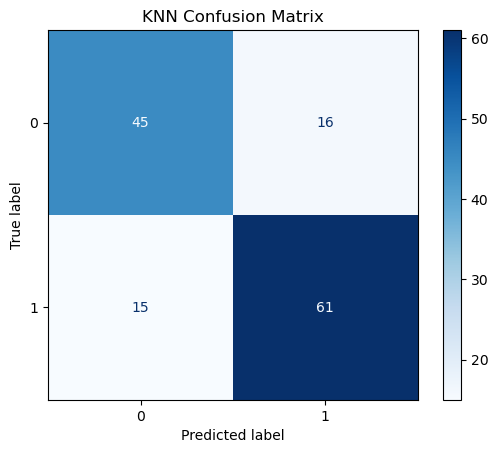

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained your model and have the predicted labels `y_pred`
y_pred = knn.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
cm_display.plot(cmap='Blues', values_format='d')

# Add a title to the plot
plt.title('KNN Confusion Matrix')
plt.show()


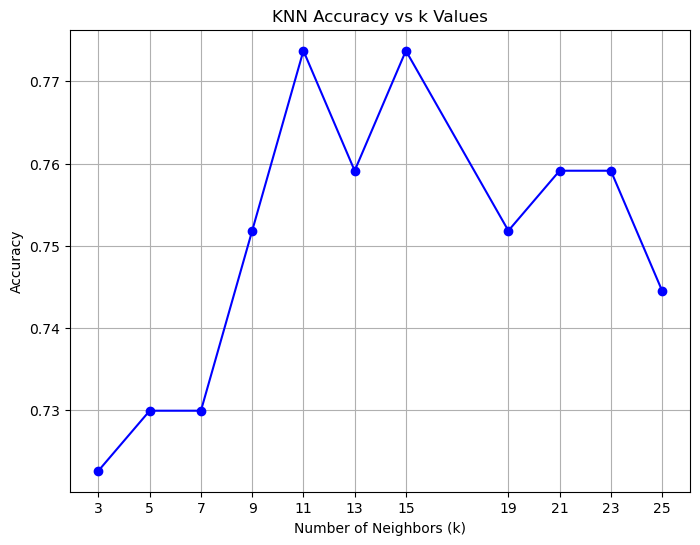

In [114]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# List of k values to test
k_values = [3, 5, 7, 9, 11, 13, 15, 19, 21, 23, 25]

# List to store accuracy scores for each k
accuracy_k = []

# Loop through each k value, train the model, and store the accuracy
for k in k_values:
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions
    knn_preds = knn.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, knn_preds)
    accuracy_k.append(accuracy)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_k, marker='o', linestyle='-', color='b')
plt.title("KNN Accuracy vs k Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)  # Ensure that all k-values are labeled on the x-axis
plt.grid(True)
plt.show()


In [100]:
knn_x = dataset[['high_speed_internet_access_2022','home_ownership_2022']]
knn_y = dataset['median_age_of_residents_2022_binary']

In [101]:
knn = KNeighborsClassifier(n_neighbors=15)

X_train, X_test, y_train, y_test = train_test_split(knn_x, knn_y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)


accuracy = cross_val_score(knn, X_test_scaled, y_test, cv = 8)
print(f"KNN cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

KNN cross-validation accuracy: 78.92%


In [102]:
knn = KNeighborsClassifier(n_neighbors=15)

X_train, X_test, y_train, y_test = train_test_split(knn_x, knn_y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=15)

In [103]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.4f}%")

Accuracy: 77.3723%


In [104]:
knn_x = dataset[['high_speed_internet_access_2022','home_ownership_2022']]
knn_y = dataset['median_age_of_residents_2022_binary']

In [105]:
knn = KNeighborsClassifier(n_neighbors=15)

X_train, X_test, y_train, y_test = train_test_split(knn_x, knn_y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)

y_true = y_test
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.4f}%")


accuracy = cross_val_score(knn, X_test_scaled, y_test, cv = 8)
print(f"KNN cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

Accuracy: 77.3723%
KNN cross-validation accuracy: 78.92%


In [106]:
knn_x = dataset[['high_speed_internet_access_2022','home_ownership_2022','single_family_housing_2022_Raw','proximity_to_public_transportation_2022']]
knn_y = dataset['median_age_of_residents_2022_binary']

In [107]:
knn = KNeighborsClassifier(n_neighbors=59)

X_train, X_test, y_train, y_test = train_test_split(knn_x, knn_y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)

y_true = y_test
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.4f}%")


accuracy = cross_val_score(knn, X_test_scaled, y_test, cv = 8)
print(f"KNN cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

Accuracy: 75.9124%
KNN cross-validation accuracy: 73.82%


**FINAL MODEL KNN:**

In [108]:
knn_x = dataset[['high_speed_internet_access_2022','home_ownership_2022']]
knn_y = dataset['median_age_of_residents_2022_binary']

In [109]:
knn = KNeighborsClassifier(n_neighbors=15)

X_train, X_test, y_train, y_test = train_test_split(knn_x, knn_y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)

y_true = y_test
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.4f}%")


accuracy = cross_val_score(knn, X_test_scaled, y_test, cv = 8)
print(f"KNN cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

Accuracy: 77.3723%
KNN cross-validation accuracy: 78.92%
